<a href="https://colab.research.google.com/github/Florani1/First-Model/blob/main/stockprice_webscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Webscraping YahooFinance Webpage for todays stock price

---



## Load in all the necessary libraries and get the web page

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import json
import pandas as pd

Get the webpage

In [3]:
resp = requests.get('https://finance.yahoo.com/losers?.tsrc=fin-srch')
resp

<Response [200]>

In [4]:
resp.text

'<!doctype html><html data-color-theme="light" id="atomic" class="NoJs chrome desktop failsafe" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"><title>Top Stock Losers Today - Yahoo Finance</title><meta name="keywords" content="Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens"><meta http-equiv="x-dns-prefetch-control" content="on"><meta property="twitter:dnt" content="on"><meta property="fb:app_id" content="458584288257241"><meta name="theme-color" content="#400090"><meta name="viewport" content="width=device-width, initial-scale=1"><meta name="description" lang="en-US" content="See the list of the top losing stocks today, including share price change and percentage, trading volume, intraday highs and lows, an

In [5]:
soup = bs(resp.content)
soup

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" data-color-theme="light" id="atomic" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Top Stock Losers Today - Yahoo Finance</title><meta content="Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="See the list of the top losing stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts." lang="en-US"

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" data-color-theme="light" id="atomic" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Top Stock Losers Today - Yahoo Finance
  </title>
  <meta content="Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="See the list of the top losing stocks today, including share price change and percentage, trading volume, intraday

## Start using BeautifulSoup to Scrape

In [7]:
print(soup)

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" data-color-theme="light" id="atomic" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Top Stock Losers Today - Yahoo Finance</title><meta content="Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="See the list of the top losing stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts." lang="en-US"

In [8]:
table = soup.table

In [9]:
columns = soup.table.thead.tr.find_all('th')
columns

[<th class="Ta(start) Pstart(6px) Pend(10px) Miw(90px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)! Ta(start) Start(0) Pend(10px) Pos(st) Bgc($lv3BgColor) Z(1) Ta(start)!"><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id=""><input aria-label="Select All" class="Pos(a) Op(0) checkbox" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) checkbox:f+Stk($linkColor)! checkbox:f+Fill($linkColor)! Stk($plusGray) Fill($plusGray) Cur(p)" data-icon="checkbox-unchecked" height="16" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label>Symbol<div class="W(3px) Pend(5px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n)"></div></th>,
 <th class="Ta(start) Px(10px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Name</th>,
 <th class="Ta(end) Pstart(2

In [10]:
column_names = [c.string for c in columns]
column_names

[None,
 'Name',
 'Price (Intraday)',
 'Change',
 None,
 'Volume',
 'Avg Vol (3 month)',
 'Market Cap',
 'PE Ratio (TTM)',
 '52 Week Range']

In [11]:
table_rows = table.find('tbody').find_all("tr")
table_rows

[<tr class="simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)"><td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input aria-label="Select LIFW" class="Pos(a) Op(0) checkbox" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) checkbox:f+Stk($linkColor)! checkbox:f+Fill($linkColor)! Stk($plusGray) Fill($plusGray) Cur(p)" data-icon="checkbox-unchecked" height="16" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/LIFW?p=LIFW" title="MSP Recovery, Inc.">LIFW</a><div 

## Converting the scraped data to a dataframe

In [12]:
table_rows = table.find('tbody').find_all('tr')
data = []
for tr in table_rows:
  td = tr.find_all('td')
  row = [str(tr.get_text()).strip()for tr in td]
  data.append(row)

df = pd.DataFrame(data, columns=column_names)
df

None                                   Name Price (Intraday)   Change  \
0    LIFW                     MSP Recovery, Inc.             6.40    -3.25   
1    ICUI                      ICU Medical, Inc.            83.68   -18.32   
2    SWAV                Shockwave Medical, Inc.           179.00   -35.90   
3    SANM                    Sanmina Corporation            45.33    -7.48   
4    NOVT                           Novanta Inc.           121.55   -16.91   
5    MLCO  Melco Resorts & Entertainment Limited             7.81    -1.10   
6     APD       Air Products and Chemicals, Inc.           255.83   -35.47   
7     TDW                         Tidewater Inc.            60.62    -7.46   
8    CNHI                    CNH Industrial N.V.            10.18    -1.16   
9     CPG            Crescent Point Energy Corp.             7.22    -0.77   
10    PKX                    POSCO Holdings Inc.            88.56    -8.44   
11    EMR                   Emerson Electric Co.            84.77    -6.97   
12    CXT                         Crane NXT, Co.            49.88    -3.95   
13    AMC       AMC Entertainment Holdings, Inc.            10.23    -0.72   
14   WFRD          Weatherford International plc            92.91    -6.58   
15    HPK                  HighPeak Energy, Inc.            15.89    -1.05   
16  UNICY                   Unicharm Corporation             6.60    -0.45   
17    HCC                 Warrior Met Coal, Inc.            46.02    -3.05   
18  PCCYF             PetroChina Company Limited           0.6400  -0.0400   
19   LBRT                    Liberty Energy Inc.            18.99    -1.17   
20    BTE                    Baytex Energy Corp.           4.0400  -0.2500   
21    OII        Oceaneering International, Inc.            21.04    -1.24   
22    KOS                     Kosmos Energy Ltd.             6.70    -0.36   
23   ARCH                   Arch Resources, Inc.           141.99    -7.59   
24    SLB                   Schlumberger Limited            53.63    -2.85   

       None   Volume Avg Vol (3 month) Market Cap PE Ratio (TTM) 52 Week Range  
0   -33.68%  10.569M            3.184M    19.968B            N/A                
1   -17.96%  736,644           214,300      2.02B            N/A                
2   -16.71%   2.035M           587,992     6.578B          27.97                
3   -14.16%  825,674           353,360     2.594B           8.75                
4   -12.21%  754,850           163,453     4.352B          56.53                
5   -12.35%    5.35M            2.344M     3.414B            N/A                
6   -12.18%   3.152M           714,607    56.833B          26.13                
7   -10.96%   1.984M           824,009     3.193B          57.19                
8   -10.23%   15.78M            6.485M    13.532B           5.92                
9    -9.64%   8.865M            3.136M     3.797B          19.00                
10   -8.70%  263,801           219,228      27.6B          27.67                
11   -7.60%   5.506M             2.67M    48.447B          15.22                
12   -7.34%  286,907           272,525     2.833B           7.27                
13   -6.58%  12.813M           21.319M     2.029B            N/A                
14   -6.61%   1.268M             1.23M     6.701B          19.48                
15   -6.17%  351,155           474,034     2.037B          11.11                
16   -6.35%   74,102           153,925    19.615B          41.25                
17   -6.22%  529,373           680,184     2.394B           5.33                
18   -5.88%   44,001           195,017   163.456B           5.33                
19   -5.83%   1.674M            3.584M     3.201B           5.53                
20   -5.83%   9.421M            7.844M     3.426B           4.54                
21   -5.57%  561,758            1.072M     2.119B          28.05                
22   -5.17%   4.535M            4.755M     3.081B          41.84                
23   -5.07%  323,047           3

## To export the dataframe to Excel

In [32]:
from lxml import html

In [33]:
writer = pd.ExcelWriter('pandas_stock.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

<ipython-input-33-cf7e5cf34439>:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [23]:
def export_data(data):
  df = pd.DataFrame(data)
  df.to_excel('stock.xlsx')

In [31]:
excel_file_path = r'C:\Users\FLORA.AKANBI\Desktop.xlsx'
df.to_excel(excel_file_path, index=False)

## Data Cleaning and importing excel file

In [25]:
df = pd.read_excel("/pandas_stock.xlsx")
df

ID Symbol                                   Name  Price (Intraday)  \
0    0   LIFW                     MSP Recovery, Inc.            6.9500   
1    1   NOVT                           Novanta Inc.          118.8500   
2    2   ICUI                      ICU Medical, Inc.           85.6000   
3    3   SANM                    Sanmina Corporation           44.9000   
4    4   SWAV                Shockwave Medical, Inc.          183.7700   
5    5    APD       Air Products and Chemicals, Inc.          256.9300   
6    6   MLCO  Melco Resorts & Entertainment Limited            7.9400   
7    7   CNHI                    CNH Industrial N.V.           10.3400   
8    8    PKX                    POSCO Holdings Inc.           88.8000   
9    9    CPG            Crescent Point Energy Corp.            7.3300   
10  10    EMR                   Emerson Electric Co.           84.2700   
11  11    CXT                         Crane NXT, Co.           50.1300   
12  12    TDW                         Tidewater Inc.           63.1900   
13  13    HCC                 Warrior Met Coal, Inc.           45.8300   
14  14     GH                  Guardant Health, Inc.           25.9100   
15  15    VET                  Vermilion Energy Inc.           13.0700   
16  16  RIOCF    RioCan Real Estate Investment Trust           12.2100   
17  17  UNICY                   Unicharm Corporation            6.6400   
18  18  JBAXY                   Julius Bär Gruppe AG           11.1500   
19  19    BTE                    Baytex Energy Corp.            4.0401   
20  20   WFRD          Weatherford International plc           94.1700   
21  21   ARCH                   Arch Resources, Inc.          141.8600   
22  22    SWN            Southwestern Energy Company            6.6800   
23  23    CPE               Callon Petroleum Company           33.5600   
24  24  DKILY                 Daikin Industries,Ltd.           14.5600   

     Change  %Change   Volume Avg Vol (3 month) Market Cap  PE Ratio (TTM)  
0   -2.6900  -27.93%   6.696M            3.184M      21.7B             NaN  
1  -19.6100  -14.16%  243,277           163,453     4.256B           55.28  
2  -16.4000  -16.08%  185,788           214,300     2.066B             NaN  
3   -7.9100  -14.98%  379,895           353,360     2.569B            8.67  
4  -31.1300  -14.49%  636,180           587,992     6.754B           28.71  
5  -34.3700  -11.80%   1.309M           714,607    57.077B           26.24  
6   -0.9700  -10.89%   2.459M            2.344M      3.47B             NaN  
7   -1.0000   -8.82%   7.343M            6.485M    13.745B            6.01  
8   -8.2000   -8.45%  166,721           219,228    27.675B           27.75  
9   -0.6600   -8.26%   4.365M            3.136M     3.855B           19.29  
10  -7.4700   -8.15%   2.552M             2.67M    48.158B           15.13  
11  -3.7000   -6.87%   59,574           272,525     2.847B            7.31  
12  -4.9000   -7.19%  597,247           824,009     3.328B           59.61  
13  -3.2400   -6.60%  252,661           680,184     2.384B            5.30  
14  -1.8300   -6.60%  400,455            1.627M     3.049B             NaN  
15  -0.8900   -6.38%  657,876            1.135M     2.146B            3.11  
16  -0.7800   -5.98%   30,872            24,629     3.682B           33.00  
17  -0.4100   -5.78%   25,519           153,925    19.734B           41.50  
18  -0.6700   -5.67%   27,104           100,240    11.435B           10.05  
19  -0.2499   -5.83%   2.829M            7.844M     3.426B            4.54  
20  -5.3200   -5.34%  494,982             1.23M     6.792B           19.74  
21  -7.7100   -5.15%   94,741           384,550     2.606B            3.46  
22  -0.3600   -5.18%   6.874M           19.823M     7.352B            1.45  
23  -1.7200   -4.86%  499,430            1.639M     2.275B            3.26  
24  -0.7300   -4.74%   34,971           319,134    43.076B           23.88

## Data Analysis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 25 non-null     int64  
 1   Symbol             25 non-null     object 
 2   Name               25 non-null     object 
 3   Price (Intraday)   25 non-null     float64
 4   Change             25 non-null     float64
 5   %Change            25 non-null     object 
 6   Volume             25 non-null     object 
 7   Avg Vol (3 month)  25 non-null     object 
 8   Market Cap         25 non-null     object 
 9   PE Ratio (TTM)     21 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ KB


Remove null values

In [30]:
df2 = df.dropna(axis = 0)
df2

ID Symbol                                 Name  Price (Intraday)   Change  \
1    1   NOVT                         Novanta Inc.          118.8500 -19.6100   
3    3   SANM                  Sanmina Corporation           44.9000  -7.9100   
4    4   SWAV              Shockwave Medical, Inc.          183.7700 -31.1300   
5    5    APD     Air Products and Chemicals, Inc.          256.9300 -34.3700   
7    7   CNHI                  CNH Industrial N.V.           10.3400  -1.0000   
8    8    PKX                  POSCO Holdings Inc.           88.8000  -8.2000   
9    9    CPG          Crescent Point Energy Corp.            7.3300  -0.6600   
10  10    EMR                 Emerson Electric Co.           84.2700  -7.4700   
11  11    CXT                       Crane NXT, Co.           50.1300  -3.7000   
12  12    TDW                       Tidewater Inc.           63.1900  -4.9000   
13  13    HCC               Warrior Met Coal, Inc.           45.8300  -3.2400   
15  15    VET                Vermilion Energy Inc.           13.0700  -0.8900   
16  16  RIOCF  RioCan Real Estate Investment Trust           12.2100  -0.7800   
17  17  UNICY                 Unicharm Corporation            6.6400  -0.4100   
18  18  JBAXY                 Julius Bär Gruppe AG           11.1500  -0.6700   
19  19    BTE                  Baytex Energy Corp.            4.0401  -0.2499   
20  20   WFRD        Weatherford International plc           94.1700  -5.3200   
21  21   ARCH                 Arch Resources, Inc.          141.8600  -7.7100   
22  22    SWN          Southwestern Energy Company            6.6800  -0.3600   
23  23    CPE             Callon Petroleum Company           33.5600  -1.7200   
24  24  DKILY               Daikin Industries,Ltd.           14.5600  -0.7300   

    %Change   Volume Avg Vol (3 month) Market Cap  PE Ratio (TTM)  
1   -14.16%  243,277           163,453     4.256B           55.28  
3   -14.98%  379,895           353,360     2.569B            8.67  
4   -14.49%  636,180           587,992     6.754B           28.71  
5   -11.80%   1.309M           714,607    57.077B           26.24  
7    -8.82%   7.343M            6.485M    13.745B            6.01  
8    -8.45%  166,721           219,228    27.675B           27.75  
9    -8.26%   4.365M            3.136M     3.855B           19.29  
10   -8.15%   2.552M             2.67M    48.158B           15.13  
11   -6.87%   59,574           272,525     2.847B            7.31  
12   -7.19%  597,247           824,009     3.328B           59.61  
13   -6.60%  252,661           680,184     2.384B            5.30  
15   -6.38%  657,876            1.135M     2.146B            3.11  
16   -5.98%   30,872            24,629     3.682B           33.00  
17   -5.78%   25,519           153,925    19.734B           41.50  
18   -5.67%   27,104           100,240    11.435B           10.05  
19   -5.83%   2.829M            7.844M     3.426B            4.54  
20   -5.34%  494,982             1.23M     6.792B           19.74  
21   -5.15%   94,741           384,550     2.606B            3.46  
22   -5.18%   6.874M           19.823M     7.352B            1.45  
23   -4.86%  499,430            1.639M     2.275B            3.26  
24   -4.74%   34,971           319,134    43.076B           23.88

In [31]:
df2.describe()

ID  Price (Intraday)     Change  PE Ratio (TTM)
count  21.000000         21.000000  21.000000       21.000000
mean   13.238095         61.537148  -6.715710       19.204286
std     7.013592         67.467110   9.789023       17.129207
min     1.000000          4.040100 -34.370000        1.450000
25%     8.000000         11.150000  -7.710000        5.300000
50%    13.000000         44.900000  -3.240000       15.130000
75%    19.000000         88.800000  -0.730000       27.750000
max    24.000000        256.930000  -0.249900       59.610000

In [ ]:
The maximum stock price

In [33]:
max_price = df2['Price (Intraday)'].max()
max_price

256.93

## Data Visualization

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'MSP Recovery, Inc.'),
  Text(1, 0, 'Novanta Inc.'),
  Text(2, 0, 'ICU Medical, Inc.'),
  Text(3, 0, 'Sanmina Corporation'),
  Text(4, 0, 'Shockwave Medical, Inc.'),
  Text(5, 0, 'Air Products and Chemicals, Inc.'),
  Text(6, 0, 'Melco Resorts & Entertainment Limited'),
  Text(7, 0, 'CNH Industrial N.V.'),
  Text(8, 0, 'POSCO Holdings Inc.'),
  Text(9, 0, 'Crescent Point Energy Corp.'),
  Text(10, 0, 'Emerson Electric Co.'),
  Text(11, 0, 'Crane NXT, Co.'),
  Text(12, 0, 'Tidewater Inc.'),
  Text(13, 0, 'Warrior Met Coal, Inc.'),
  Text(14, 0, 'Guardant Health, Inc.'),
  Text(15, 0, 'Vermilion Energy Inc.'),
  Text(16, 0, 'RioCan Real Estate Investment Trust'),
  Text(17, 0, 'Unicharm Corporation'),
  Text(18, 0, 'Julius Bär Gruppe AG'),
  Text(19, 0, 'Baytex Energy Corp.'),
  Text(20, 0, 'Weatherford International plc'),
  Text(21, 0

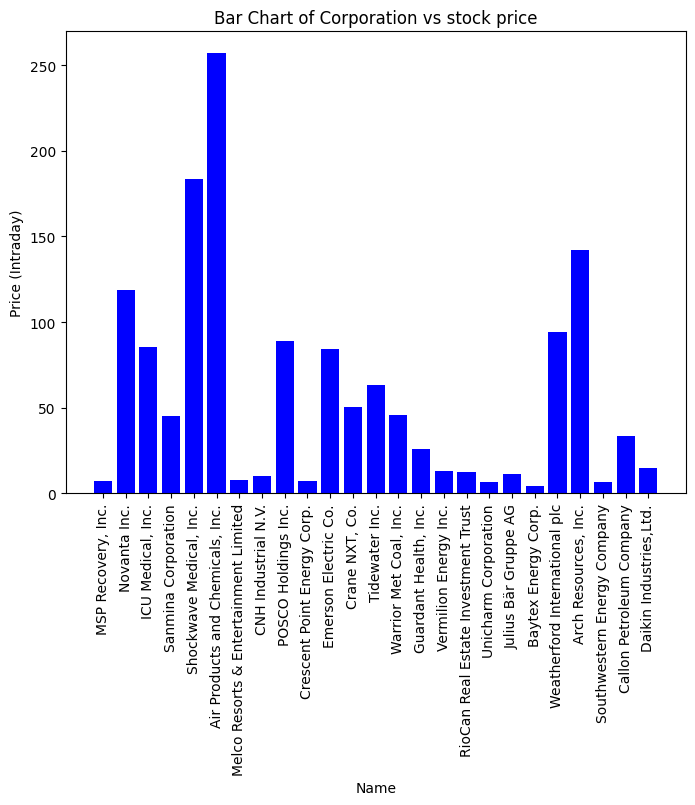

In [39]:
plt.figure(figsize=(8, 6))
plt.bar(df['Name'], df['Price (Intraday)'], color='blue')
plt.xlabel('Name')
plt.ylabel('Price (Intraday)')
plt.title('Bar Chart of Corporation vs stock price')
plt.xticks(rotation=90)

The Visualization above shows that Air Products and Chemicals Inc. has the highest stock prices

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Novanta Inc.'),
  Text(1, 0, 'Sanmina Corporation'),
  Text(2, 0, 'Shockwave Medical, Inc.'),
  Text(3, 0, 'Air Products and Chemicals, Inc.'),
  Text(4, 0, 'CNH Industrial N.V.'),
  Text(5, 0, 'POSCO Holdings Inc.'),
  Text(6, 0, 'Crescent Point Energy Corp.'),
  Text(7, 0, 'Emerson Electric Co.'),
  Text(8, 0, 'Crane NXT, Co.'),
  Text(9, 0, 'Tidewater Inc.'),
  Text(10, 0, 'Warrior Met Coal, Inc.'),
  Text(11, 0, 'Vermilion Energy Inc.'),
  Text(12, 0, 'RioCan Real Estate Investment Trust'),
  Text(13, 0, 'Unicharm Corporation'),
  Text(14, 0, 'Julius Bär Gruppe AG'),
  Text(15, 0, 'Baytex Energy Corp.'),
  Text(16, 0, 'Weatherford International plc'),
  Text(17, 0, 'Arch Resources, Inc.'),
  Text(18, 0, 'Southwestern Energy Company'),
  Text(19, 0, 'Callon Petroleum Company'),
  Text(20, 0, 'Daikin Industries,Ltd.')])

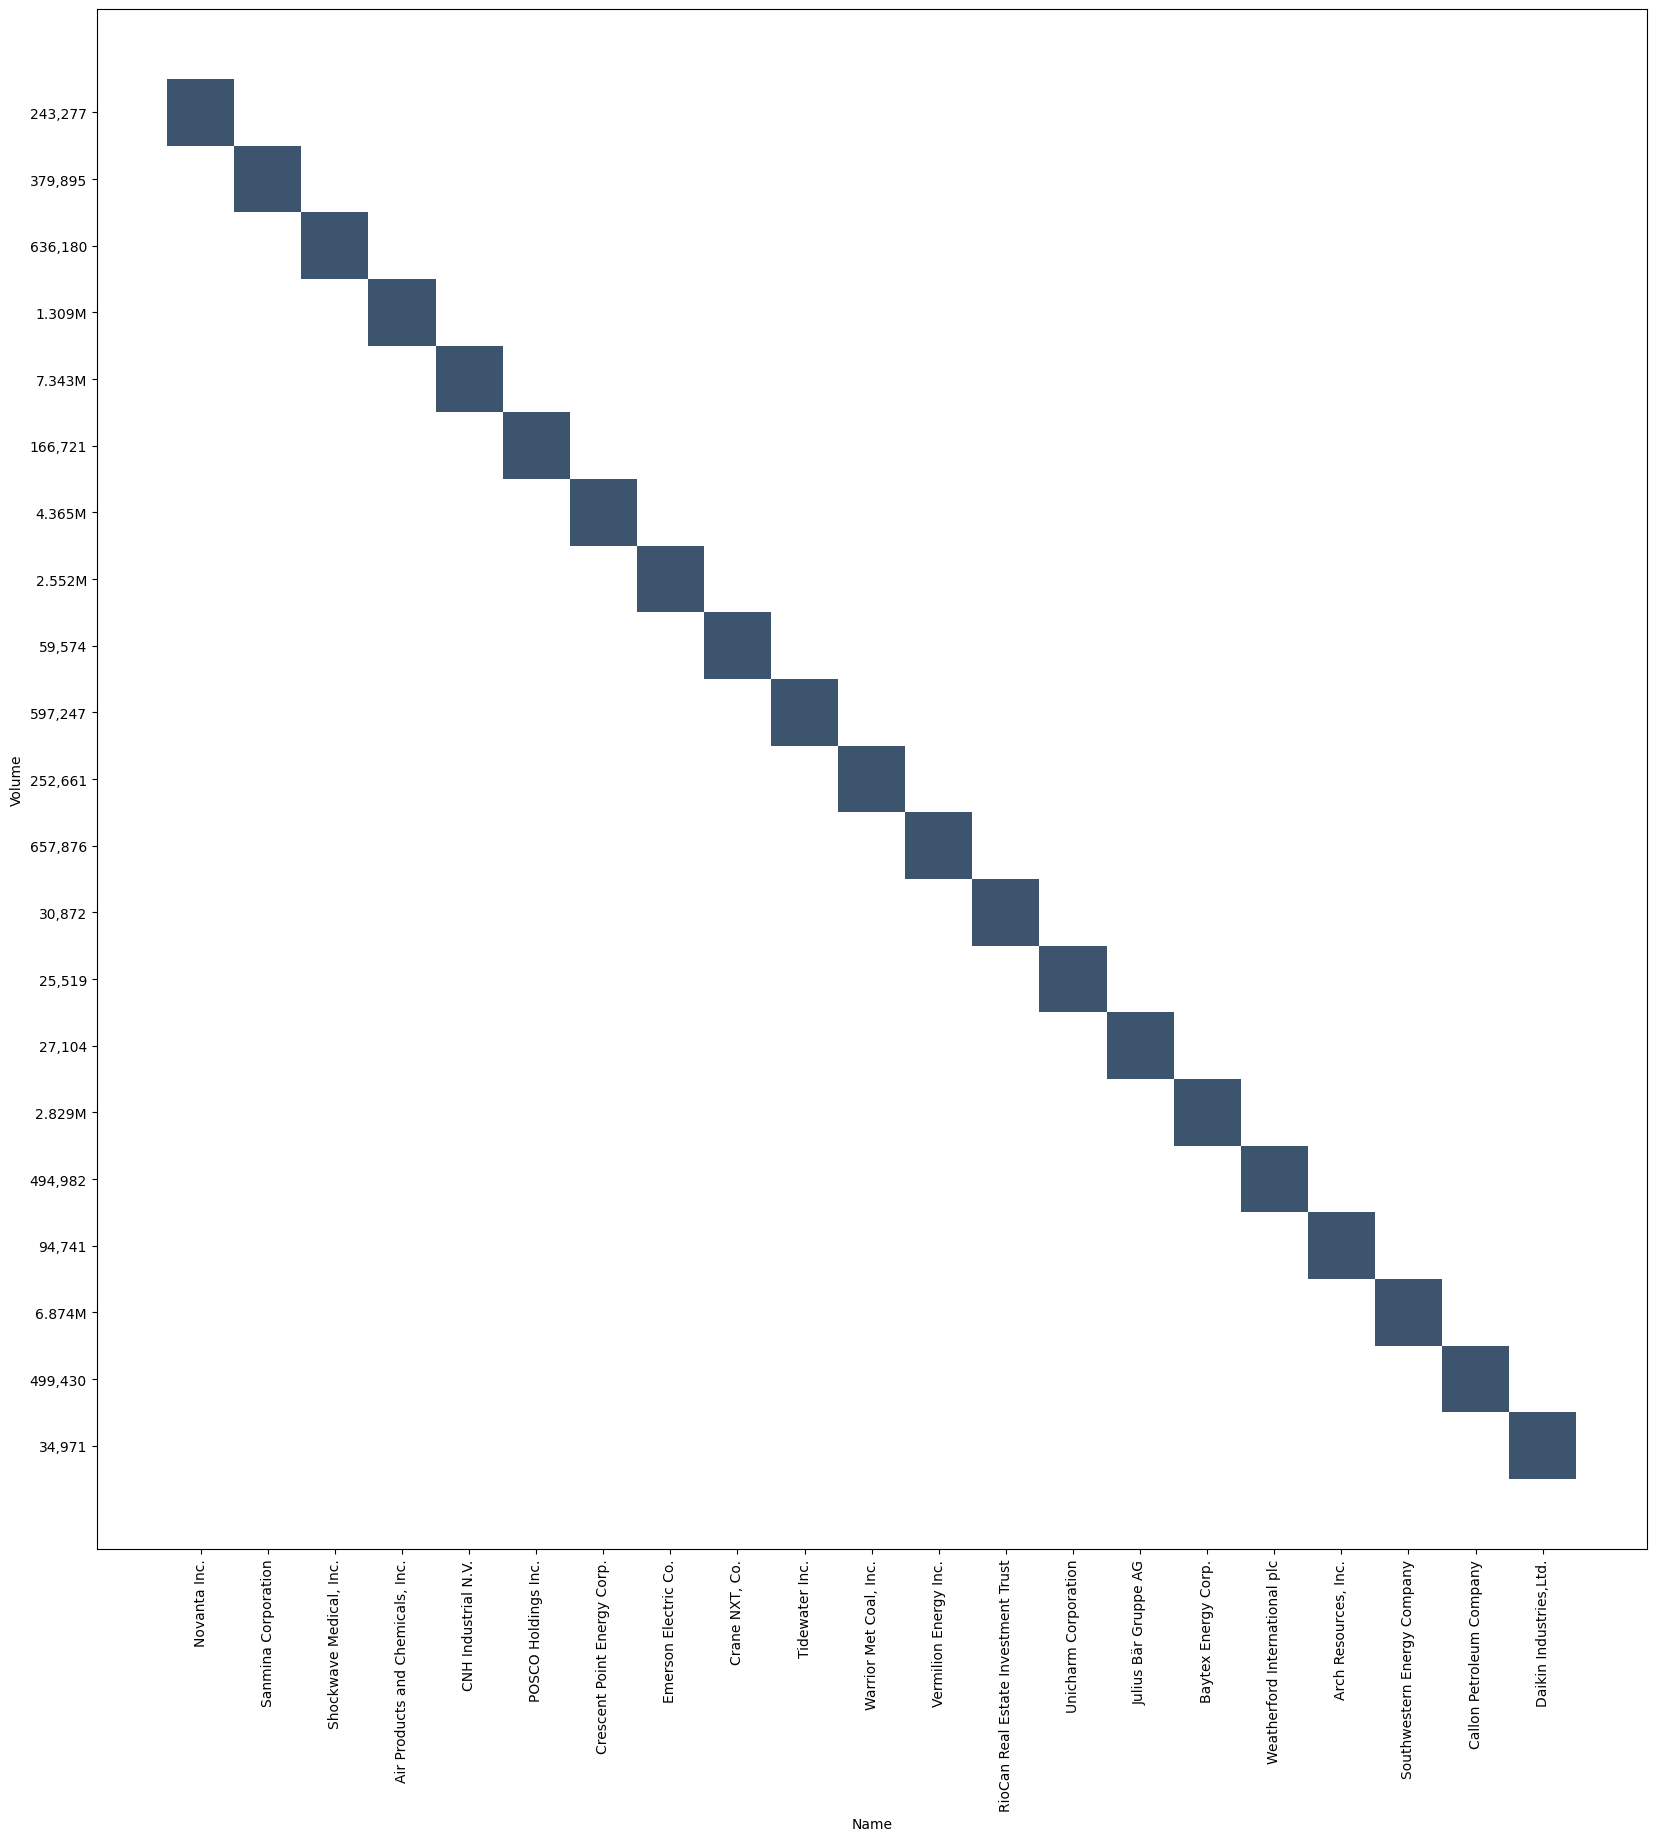

In [42]:
fig = plt.figure(figsize=(20,20))
sns.histplot(x='Name', y='Volume',data = df2)
plt.xticks(rotation=90)

<Axes: ylabel='%Change'>

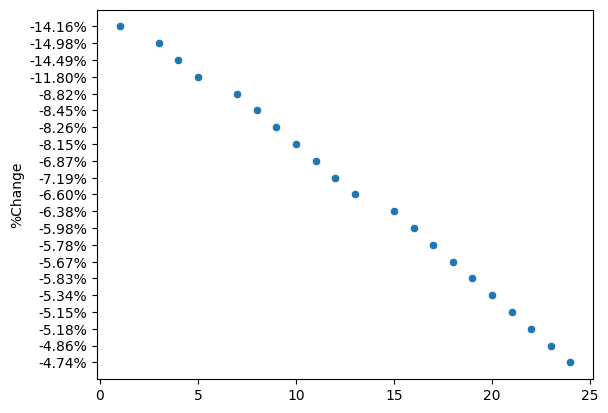

In [43]:
sns.scatterplot(df2['%Change'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'NOVT'),
  Text(1, 0, 'SANM'),
  Text(2, 0, 'SWAV'),
  Text(3, 0, 'APD'),
  Text(4, 0, 'CNHI'),
  Text(5, 0, 'PKX'),
  Text(6, 0, 'CPG'),
  Text(7, 0, 'EMR'),
  Text(8, 0, 'CXT'),
  Text(9, 0, 'TDW'),
  Text(10, 0, 'HCC'),
  Text(11, 0, 'VET'),
  Text(12, 0, 'RIOCF'),
  Text(13, 0, 'UNICY'),
  Text(14, 0, 'JBAXY'),
  Text(15, 0, 'BTE'),
  Text(16, 0, 'WFRD'),
  Text(17, 0, 'ARCH'),
  Text(18, 0, 'SWN'),
  Text(19, 0, 'CPE'),
  Text(20, 0, 'DKILY')])

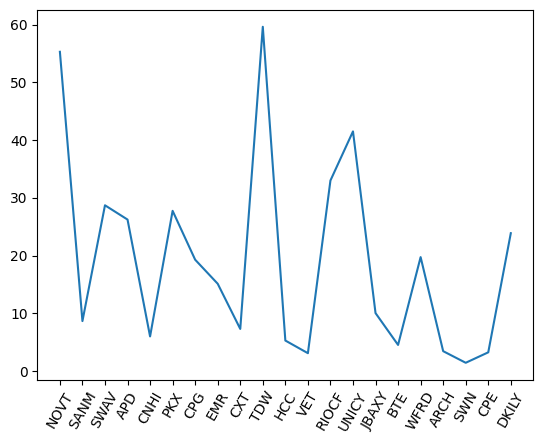

In [47]:
plt.plot(df2['Symbol'],df2['PE Ratio (TTM)'], label = 'Name')
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'NOVT'),
  Text(1, 0, 'SANM'),
  Text(2, 0, 'SWAV'),
  Text(3, 0, 'APD'),
  Text(4, 0, 'CNHI'),
  Text(5, 0, 'PKX'),
  Text(6, 0, 'CPG'),
  Text(7, 0, 'EMR'),
  Text(8, 0, 'CXT'),
  Text(9, 0, 'TDW'),
  Text(10, 0, 'HCC'),
  Text(11, 0, 'VET'),
  Text(12, 0, 'RIOCF'),
  Text(13, 0, 'UNICY'),
  Text(14, 0, 'JBAXY'),
  Text(15, 0, 'BTE'),
  Text(16, 0, 'WFRD'),
  Text(17, 0, 'ARCH'),
  Text(18, 0, 'SWN'),
  Text(19, 0, 'CPE'),
  Text(20, 0, 'DKILY')])

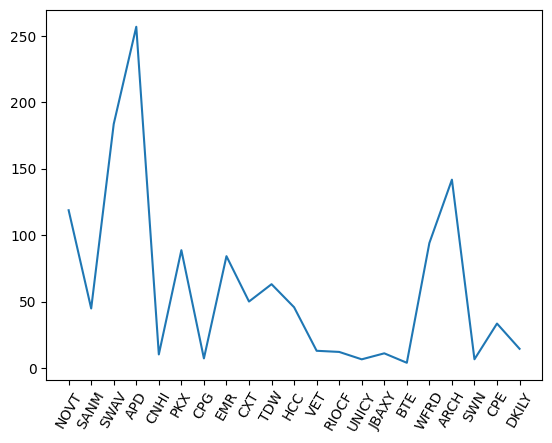

In [48]:
plt.plot(df2['Symbol'],df2['Price (Intraday)'], label = 'Name')
plt.xticks(rotation=60)